In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import seaborn as sns
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram, find_peaks

### Scipy Fast Fourier Transform Demo

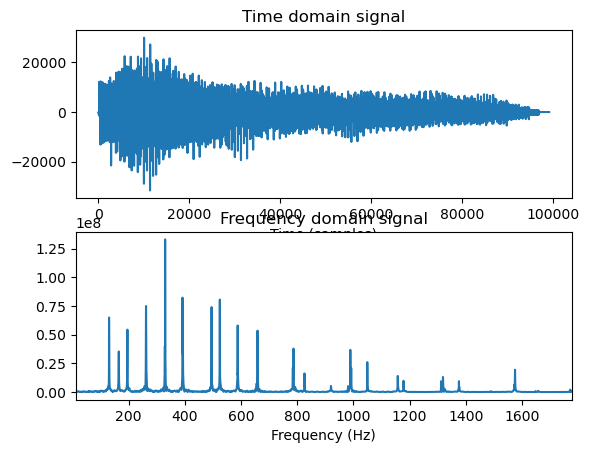

In [15]:
# Load the WAV file
rate, data = wavfile.read('Audio_Files\Major\Major_0.wav')

# Get the length of the audio data
n = len(data)

# Calculate the FFT of the audio data
fft_data = fft(data)

# Calculate the frequency range of the FFT
freqs = fftfreq(n, 1/rate)

# Find the indices of the maximum values in the FFT
max_indices = np.argmax(np.abs(fft_data))

# Zoom in on the area of spikes in the frequency domain plot
# The fundamental frequencies for the notes on a piano range from 27.5 Hz to 4186 Hz
start_index = 27
end_index = 4000
freqs = freqs[start_index:end_index]
fft_data = fft_data[start_index:end_index]

# Plot the time domain and frequency domain signals
plt.subplot(2, 1, 1)
plt.plot(data)
plt.xlabel('Time (samples)')
plt.title('Time domain signal')

plt.subplot(2, 1, 2)
plt.plot(freqs, np.abs(fft_data))
plt.xlabel('Frequency (Hz)')
plt.title('Frequency domain signal')
plt.xlim(freqs[0], freqs[-1])

plt.show()

Harmonics: [ 131.  165.  196.  262.  330.  392.  496.  525.  588.  659.  787.  826.
  989. 1050. 1158. 1179. 1312. 1319. 1376. 1576. 1838.]


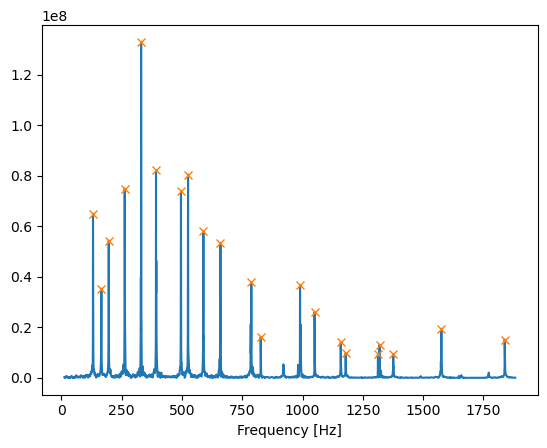

In [14]:
fft_data = np.abs(fft_data)

# h: height threshold. I defined as %5 of max value
h = fft_data.max()*5/100
peaks, _ = find_peaks(fft_data, distance=10, height = h)

freq_50_index = np.abs(freqs - 50).argmin() # finding index for 50 Hz
peaks = peaks[peaks>freq_50_index] # filtering peaks less than 50 Hz
harmonics = freqs[peaks]
print("Harmonics: {}".format(np.round(harmonics)))

# Plot
i = peaks.max() + 100
plt.plot(freqs[:i], fft_data[:i])
plt.plot(freqs[peaks], fft_data[peaks], "x")
plt.xlabel('Frequency [Hz]')
plt.show()